In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()


x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

model = tf.keras.models.Sequential()

### sequential
1 input 1 out put

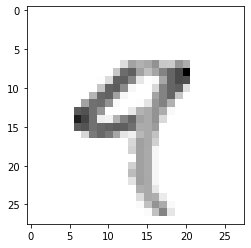

In [10]:
plt.imshow(x_train[4],cmap = plt.cm.binary)
plt.show()


In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

#### model.add(tf.keras.layers.Flatten())
This will take input and convert it to 1D

#### model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
By this we declare hidden layer with 128 nodes. And relu as activation function

#### model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
In the last layer we need to normalize the probabilites of the out using softmax.


In [14]:
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0522 - accuracy: 0.9831
Epoch 2/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0405 - accuracy: 0.9870
Epoch 3/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0311 - accuracy: 0.9898


a number of epochs means how many times you go through your training set.

The model is updated each time a batch is processed, which means that it can be updated multiple times during one epoch. If batch_size is set equal to the length of x, then the model will be updated once per epoch.

We need to validate as NN are good at fitting so we always have risk of overfitting  

In [15]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.08983395363265881 0.974


In [16]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [19]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [20]:
predictions = new_model.predict([x_test])

7


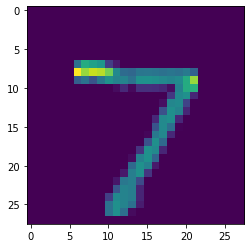

In [22]:
import numpy as np

print(np.argmax(predictions[0]))

plt.imshow(x_test[0])
plt.show()